In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

In [2]:
data = pd.read_csv('history_export.txt', sep="|", header = None,on_bad_lines='skip')
data.columns = ["Time", "URL"]

In [3]:

data['Time'] = pd.to_datetime(data['Time'])



In [4]:
data.index = data['Time']
del data['Time']
domainList = [0]*len(data)

In [5]:
headers = requests.utils.default_headers()
headers.update(
    {
        'User-Agent': 'Custom User Agent 1.0',
        'From': 'eeshn21@iitk.ac.in'  # Stick in your IITK email id
    }
)

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

data = pd.read_csv('history_export.txt', sep="|", header=None)
data.columns = ["Time", "URL"]
data['Time'] = pd.to_datetime(data['Time'])
data.index = data['Time']
del data['Time']

domainList = [0] * len(data)
headers = requests.utils.default_headers()
headers.update(
    {
        'User-Agent': 'Custom User Agent 1.0',
        'From': 'eeshn21@iitk.ac.in'  # Stick in your IITK email id
    }
)

for idx in range(len(data)):
    print(idx)
    url = data.URL[idx]
    if len(url) > 5:
        try:
            r = requests.get(url, headers=headers)
        except:
            r = ''
            pass
        if isinstance(r, requests.Response):
            soup = BeautifulSoup(r.text, 'html.parser')  # Use 'html.parser' to parse the DOM
            if len(soup('title')) > 0:
                if soup('title')[0].string is not None:
                    domainList[idx] = soup('title')[0].string.encode('utf-8').strip()
                else:
                    domainList[idx] = "Null"
            else:
                domainList[idx] = "Null"
        else:
            domainList[idx] = "Null"
    else:
        domainList[idx] = "Null"
# Assign the domainList to a new column 'Domain' in the DataFrame
data['Domain'] = domainList

data.to_csv('chrome_history.csv')
data = pd.read_csv('chrome_history.csv')
data.Time = pd.to_datetime(data.Time)
docs = data.Domain.unique()
data.head()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144


,Time,URL,Domain
0,2023-08-10 18:56:09,https://nwm.iitk.ac.in/?_task=login&_err=session,b'IIT Kanpur Webmail :: Welcome to IIT Kanpur ...
1,2023-08-10 18:48:56,https://www.google.com/url?sa=i&url=https%3A%2...,b'Redirect Notice'
2,2023-08-10 18:48:56,https://www.reddit.com/r/JEENEETards/comments/...,b'Reddit - Dive into anything'
3,2023-08-10 18:48:56,https://www.reddit.com/r/JEENEETards/comments/...,b'Reddit - Dive into anything'
4,2023-08-10 18:48:53,https://www.google.com/search?sca_esv=55556154...,b'iitk placement stats - Google Search'


In [7]:
data.to_csv('chrome_history.csv')

In [8]:
data = pd.read_csv('chrome_history.csv')
data.Time = pd.to_datetime(data.Time)
docs = data.URL.unique()

In [9]:
data.head()

,Unnamed: 0,Time,URL,Domain
0,0,2023-08-10 18:56:09,https://nwm.iitk.ac.in/?_task=login&_err=session,b'IIT Kanpur Webmail :: Welcome to IIT Kanpur ...
1,1,2023-08-10 18:48:56,https://www.google.com/url?sa=i&url=https%3A%2...,b'Redirect Notice'
2,2,2023-08-10 18:48:56,https://www.reddit.com/r/JEENEETards/comments/...,b'Reddit - Dive into anything'
3,3,2023-08-10 18:48:56,https://www.reddit.com/r/JEENEETards/comments/...,b'Reddit - Dive into anything'
4,4,2023-08-10 18:48:53,https://www.google.com/search?sca_esv=55556154...,b'iitk placement stats - Google Search'


In [10]:
! pip install stop_words

In [11]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [12]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()


In [13]:
doc_set = docs.tolist()

In [14]:
texts = []

# loop through document list
for i in doc_set:
    try:
        i.encode()
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)

        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
    
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
        # add tokens to list
        texts.append(stemmed_tokens)
    except AttributeError:
        texts.append([])
        pass
    except UnicodeDecodeError:
        texts.append([])
        pass

In [15]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [16]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

In [17]:
ldamodel.print_topics(3)

[(0,
  '0.099*"http" + 0.096*"com" + 0.085*"test" + 0.085*"www" + 0.074*"hackerrank" + 0.061*"question" + 0.029*"et63scrf50k" + 0.024*"frjjoas285" + 0.018*"3io86mbcd4k" + 0.011*"hackerearth"'),
 (1,
  '0.056*"http" + 0.047*"iitk" + 0.029*"ac" + 0.023*"nwm" + 0.021*"_task" + 0.021*"www" + 0.018*"1" + 0.018*"mail" + 0.016*"com" + 0.016*"q"'),
 (2,
  '0.051*"com" + 0.037*"http" + 0.025*"app" + 0.021*"googl" + 0.020*"2f" + 0.019*"account" + 0.018*"codesign" + 0.018*"3a" + 0.015*"googleusercont" + 0.015*"g1evt01m4ep7i30mp1tn81fjf20k4u95"')]

In [18]:
ldamodel.get_topic_terms(0,10)

[(3, 0.09922015),
 (21, 0.09572886),
 (77, 0.08491666),
 (33, 0.084877804),
 (76, 0.07358335),
 (79, 0.061417576),
 (74, 0.028526256),
 (227, 0.023820894),
 (200, 0.018180903),
 (153, 0.0106693795)]

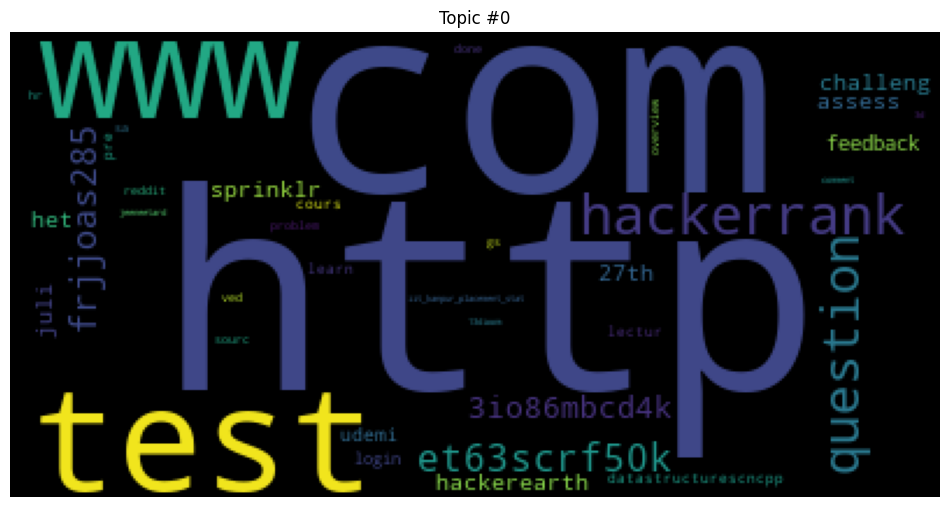

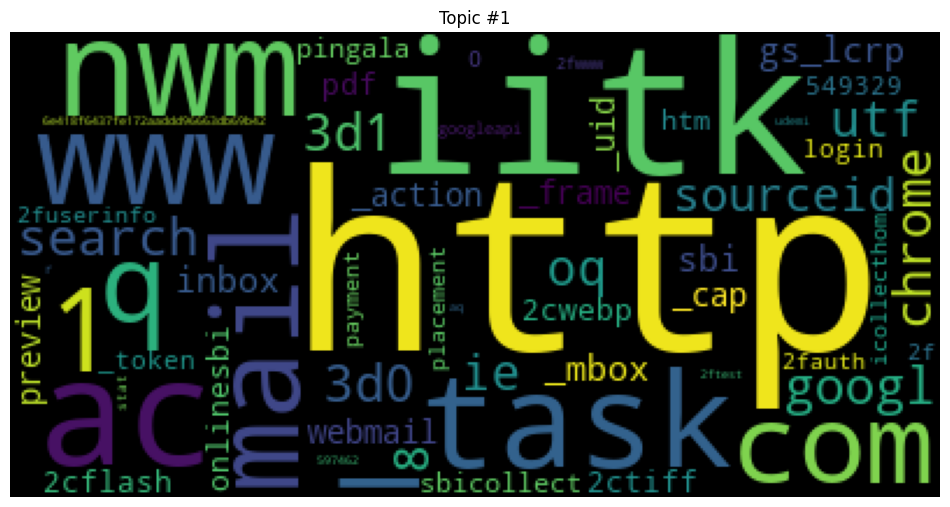

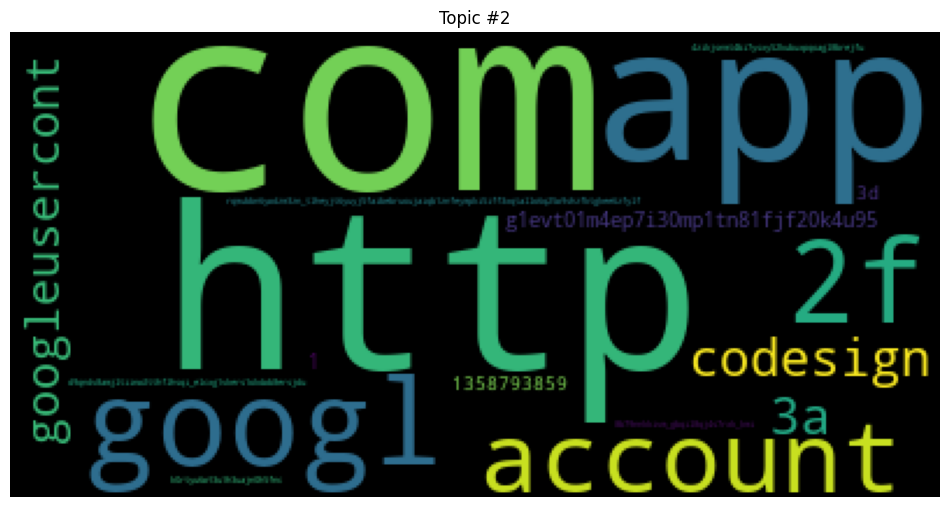

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming ldamodel is your LDA model object

for t in range(ldamodel.num_topics):
    topic_words = ldamodel.show_topic(t, 200)  # Get topic words and probabilities
    word_freq = {word: prob for word, prob in topic_words}
    # This code creates a dictionary from the words in the topic and their probabilities.
    # It does this by iterating over a list of tuples (word, prob) and creating a dictionary
    # from the tuples.

    word_freq = {word: prob for word, prob in topic_words}
    
    plt.figure(figsize=(12, 8))
    plt.imshow(WordCloud().generate_from_frequencies(word_freq))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()


In [20]:
topic = [0]*len(data)
for idx in range(len(data)):
    test_idx = doc_set.index(data.URL[idx])
    probs = ldamodel[dictionary.doc2bow(texts[test_idx])]
    prs = [item for sublist in probs for item in sublist]
    topicProbs = []
    for i in probs:
        topicProbs.append(i[1])
    topic[idx] = np.argmax(np.asarray(topicProbs))

In [21]:
data['Topic'] = topic

In [22]:
sorted_data = data.sort_values('Time')


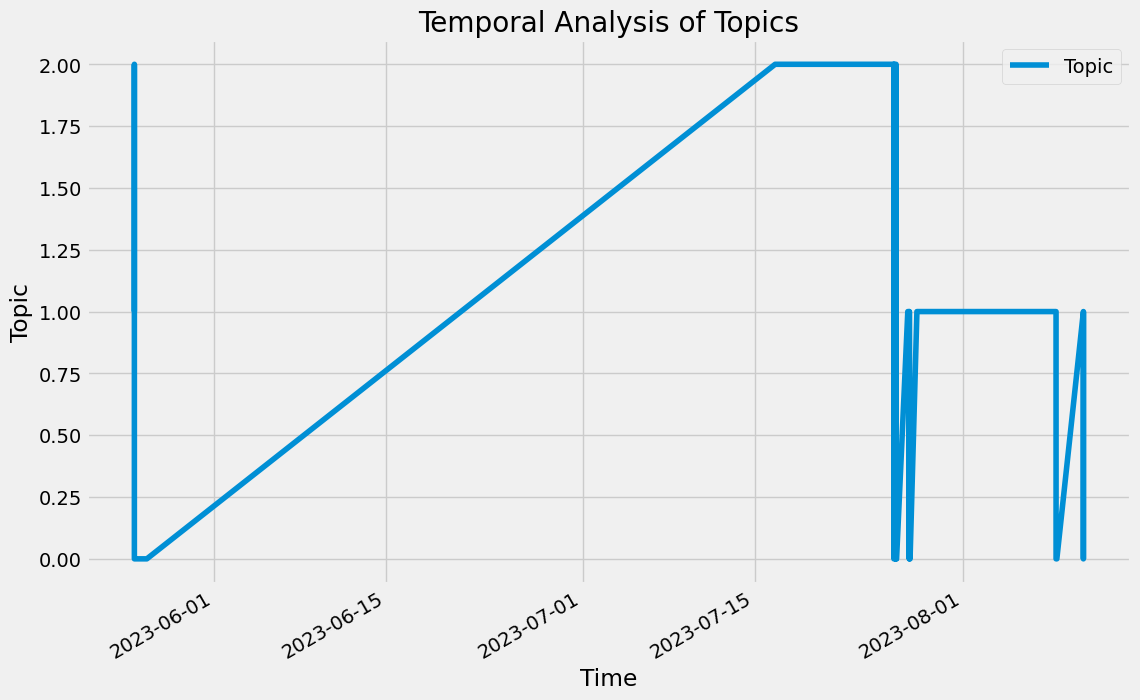

In [23]:
plt.style.use('fivethirtyeight')
sorted_data.plot(x='Time', y='Topic', figsize=(12,8))
plt.ylabel('Topic')
plt.title('Temporal Analysis of Topics')
plt.show()


Predicted topic distribution for the next hour (hour 5):
Topic
0    0.00
1    0.25
2    0.50
3    1.00
4    1.00
Name: 5, dtype: float64


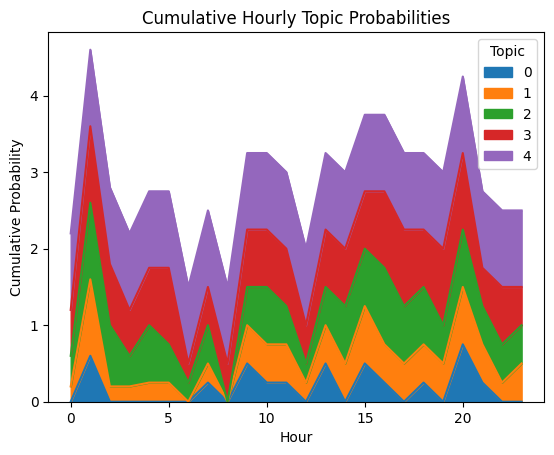

In [22]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = pd.DataFrame({
    'Topic': np.random.randint(0, 5, size=100),
}, index=pd.date_range('2023-08-01', periods=100, freq='H'))

# Group data by hour and topic
hourly_data = data.groupby([data.index.hour, 'Topic']).size().unstack(fill_value=0)
hourly_probabilities = hourly_data.div(hourly_data.sum(axis=1), axis=0)
cumulative_hourly_probabilities = hourly_probabilities.cumsum(axis=1)

# Get the current hour and calculate the next hour
current_hour = datetime.datetime.now().hour
next_hour = (current_hour + 1) % 24

# Check if next_hour is present in the index before accessing it
if next_hour in cumulative_hourly_probabilities.index:
    hourly_prediction = cumulative_hourly_probabilities.loc[next_hour]
    print("Predicted topic distribution for the next hour (hour {}):".format(next_hour))
    print(hourly_prediction)
else:
    print("Data for hour {} not available in the index.".format(next_hour))

# Plot cumulative hourly probabilities
cumulative_hourly_probabilities.plot(kind='area', stacked=True)
plt.xlabel('Hour')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Hourly Topic Probabilities')
plt.show()




In [23]:
data.head()

,Topic
2023-08-01 00:00:00,2
2023-08-01 01:00:00,0
2023-08-01 02:00:00,1
2023-08-01 03:00:00,4
2023-08-01 04:00:00,1


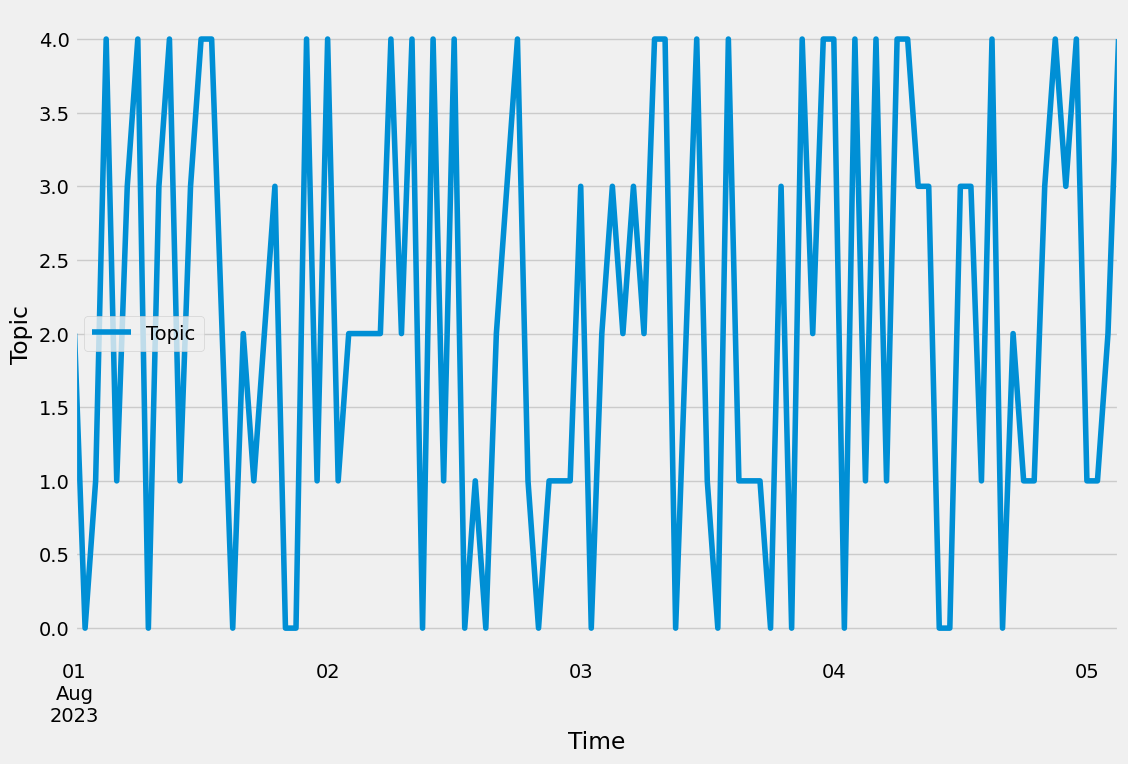

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is a DataFrame with a datetime-like index and a 'Topic' column

# Sort the data by the datetime-like index
sorted_data = data.sort_index()

# Set the style for the plot
plt.style.use('fivethirtyeight')

# Plot the sorted data
sorted_data.plot(y='Topic', figsize=(12, 8))
plt.xlabel('Time')
plt.ylabel('Topic')
plt.show()


In [25]:
cp_data = data

In [26]:
cp_data.head()

,Topic
2023-08-01 00:00:00,2
2023-08-01 01:00:00,0
2023-08-01 02:00:00,1
2023-08-01 03:00:00,4
2023-08-01 04:00:00,1


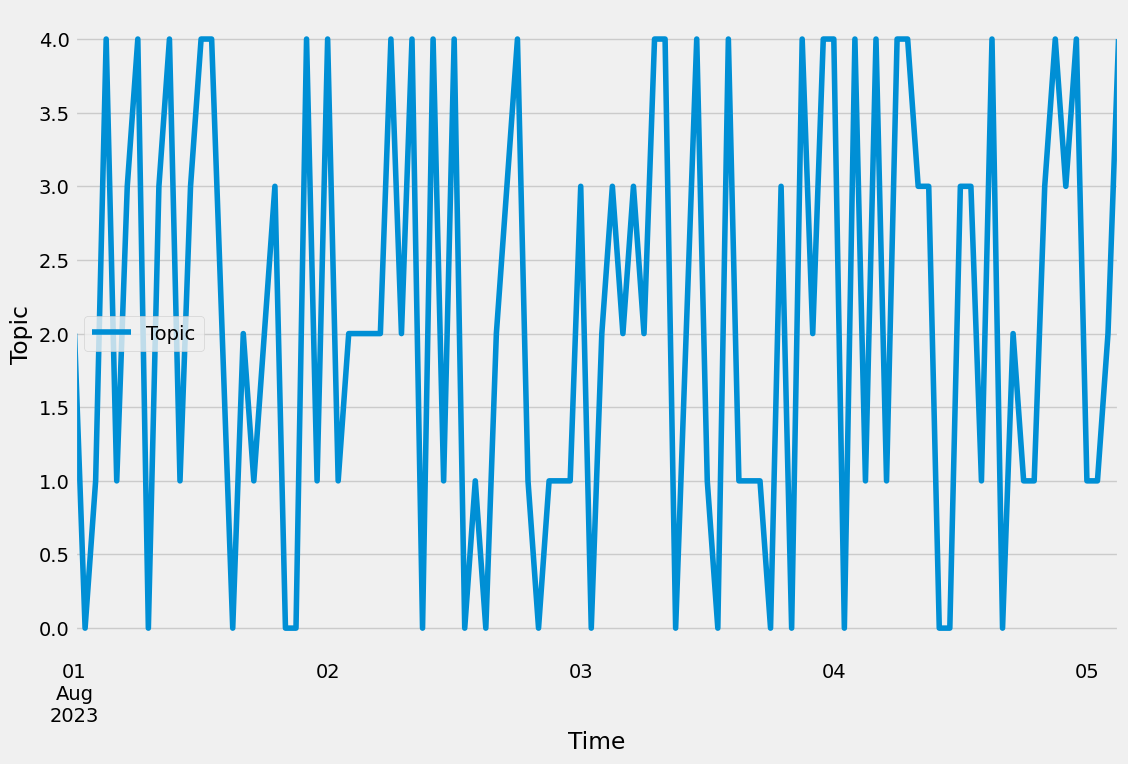

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cp_data has a datetime-like index and a 'Topic' column

# Sort the data by the datetime-like index
sorted_data = cp_data.sort_index()

# Set the style for the plot
plt.style.use('fivethirtyeight')

# Plot the sorted data
sorted_data.plot(y='Topic', figsize=(12, 8))
plt.xlabel('Time')
plt.ylabel('Topic')
plt.show()


In [28]:
import numpy as np

occurrences = []
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day_name in weekdays:
    day_index = weekdays.index(day_name)
    tlist = cp_data[cp_data.index.weekday == day_index].Topic.tolist()
    res = np.histogram(tlist, bins=[0, 1, 2, 3])
    occurrences.append(list(res[0]))


In [29]:
t0 = [0]*len(occurrences)
t1 = [0]*len(occurrences)
t2 = [0]*len(occurrences)

for d in range(len(occurrences)):
    t0[d] = occurrences[d][0]
    t1[d] = occurrences[d][1]
    t2[d] = occurrences[d][2]

cumt1 = [sum(x) for x in zip(t0, t1)]

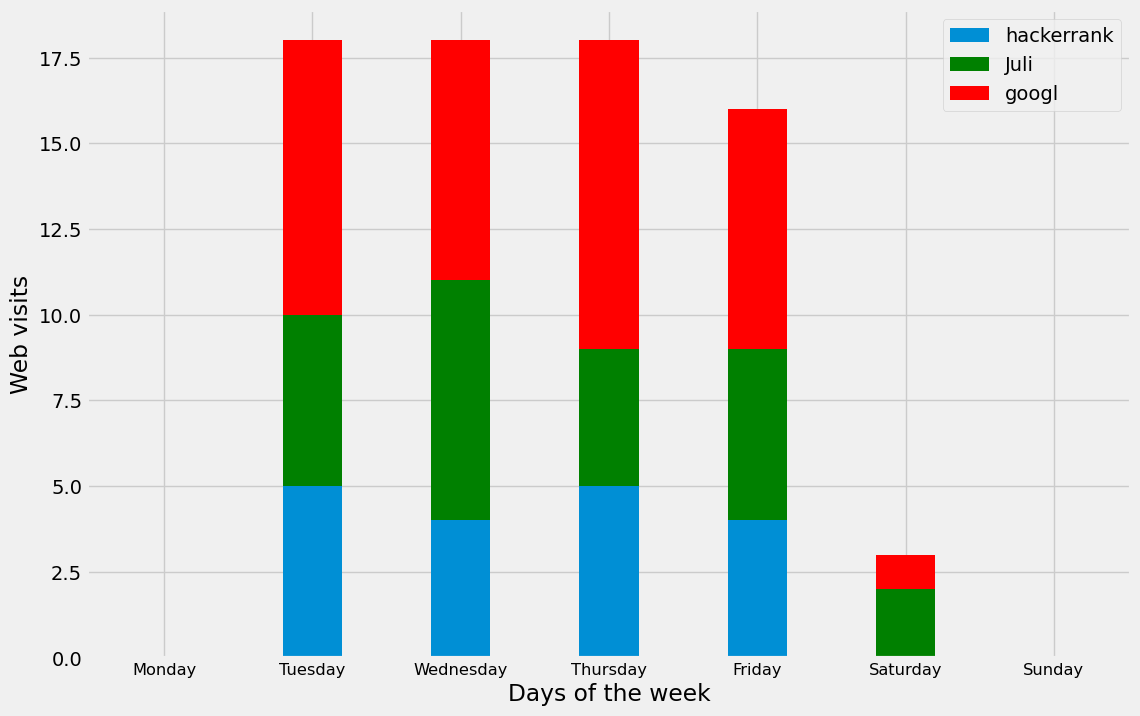

In [30]:
plt.figure(figsize=(12,8))
p0 = plt.bar(range(7), t0, 0.4, label='hackerrank')
p1 = plt.bar(range(7), t1, 0.4,bottom=t0, color='green', label='Juli')
p2 = plt.bar(range(7), t2, 0.4, bottom=cumt1, color='red', label='googl')
plt.xticks(range(7), weekdays, size='small')
plt.xlabel('Days of the week')
plt.ylabel('Web visits')
plt.legend()
plt.show()

In [31]:
# Existing code for topic modeling and occurrences

# Identify Transition Points
threshold = 0.5  # Set a threshold for topic change
transition_points = []
previous_topic = None
for idx in range(len(cp_data)):
    current_topic = cp_data.Topic[idx]
    if previous_topic is not None and abs(current_topic - previous_topic) >= threshold:
        transition_points.append(idx)
    previous_topic = current_topic

# Characterize Location within Topic and Use Dwell Time
dwell_time_threshold = pd.Timedelta(minutes=10)  # Set a threshold for dwell time
for transition_idx in transition_points:
    previous_idx = transition_idx - 1
    current_idx = transition_idx
    previous_topic_probs = ldamodel[dictionary.doc2bow(texts[previous_idx])]
    current_topic_probs = ldamodel[dictionary.doc2bow(texts[current_idx])]
    dwell_time = cp_data.index[current_idx] - cp_data.index[previous_idx]
    
    # Print or store results as needed
    print("Transition at", cp_data.index[current_idx])
    print("Previous Topic Probabilities:", previous_topic_probs)
    print("Current Topic Probabilities:", current_topic_probs)
    print("Dwell Time:", dwell_time)
    print("=" * 50)


Transition at 2023-08-01 01:00:00
Previous Topic Probabilities: [(0, 0.03765474), (1, 0.03923677), (2, 0.9231085)]
Current Topic Probabilities: [(0, 0.011438493), (1, 0.011149196), (2, 0.97741234)]
Dwell Time: 0 days 01:00:00
Transition at 2023-08-01 02:00:00
Previous Topic Probabilities: [(0, 0.011435541), (1, 0.011148718), (2, 0.97741574)]
Current Topic Probabilities: [(0, 0.03399928), (1, 0.9310517), (2, 0.03494904)]
Dwell Time: 0 days 01:00:00
Transition at 2023-08-01 03:00:00
Previous Topic Probabilities: [(0, 0.033999283), (1, 0.9310507), (2, 0.03495002)]
Current Topic Probabilities: [(0, 0.0282786), (1, 0.9427803), (2, 0.02894108)]
Dwell Time: 0 days 01:00:00
Transition at 2023-08-01 04:00:00
Previous Topic Probabilities: [(0, 0.02827859), (1, 0.94278246), (2, 0.028938929)]
Current Topic Probabilities: [(0, 0.011167806), (1, 0.010767742), (2, 0.9780645)]
Dwell Time: 0 days 01:00:00
Transition at 2023-08-01 05:00:00
Previous Topic Probabilities: [(0, 0.011159755), (1, 0.010767704

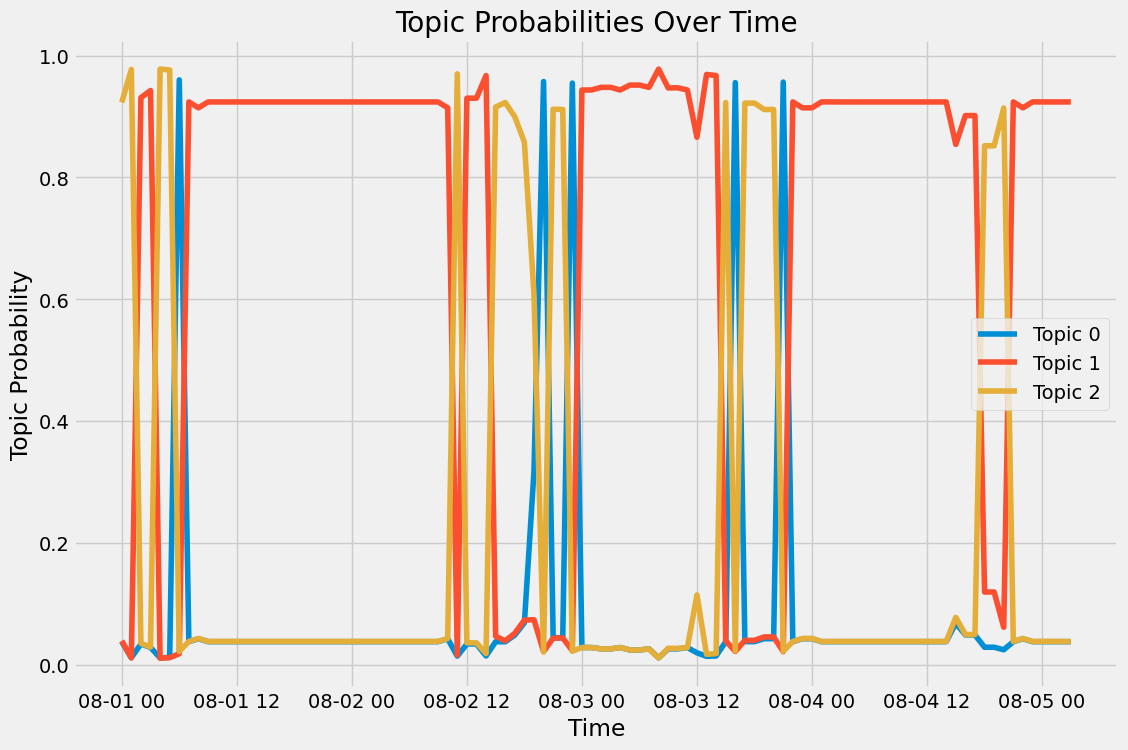

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ... (your existing code to load data and perform topic modeling)

# Initialize topic probability data for all topics
topic_probs_over_time = {topic: [] for topic in range(ldamodel.num_topics)}

# Populate topic probability data
for idx in range(len(cp_data)):
    topic_probs = ldamodel.get_document_topics(corpus[idx])
    for topic, prob in topic_probs:
        topic_probs_over_time[topic].append((cp_data.index[idx], prob))

# Create line graphs for each topic
plt.figure(figsize=(12, 8))
for topic, probs in topic_probs_over_time.items():
    time, probabilities = zip(*probs)
    plt.plot(time, probabilities, label=f"Topic {topic}")

plt.xlabel('Time')
plt.ylabel('Topic Probability')
plt.title('Topic Probabilities Over Time')
plt.legend()
plt.show()
